Assignment 1: Perceptron Learning
=================================


Microsoft Forms Document: https://forms.office.com/r/6pxGSqCxzM


Task 1: Data Generation
-----------------------

Given the number of samples and the means (mu) and standard deviations (sigma) of positive (pos) and negative (neg) data, generate and return data samples including their labels.

In [1]:
import numpy as np

def dataset(number_of_samples, mu_pos, sigma_pos, mu_neg, sigma_neg):
  # create positive and negative data
  positive_data = np.random.normal(mu_pos, sigma_pos, size=(number_of_samples//2, 2))
  negative_data = np.random.normal(mu_neg, sigma_neg, size=(number_of_samples//2, 2))

  # assign positive and negative labels
  positive_labels = np.full(number_of_samples//2, 1, int)
  negative_labels = np.full(number_of_samples//2, -1, int)

  # concatenate positive and negative data
  all_data = np.concatenate((positive_data, negative_data), axis=0) 
  all_labels = np.concatenate((positive_labels, negative_labels))

  # anything else to consider?
  # shuffle the data?

  # return both X and T
  return all_data, all_labels

Task 2: Select Data Parameters and Line Parameters
--------------------------------------------------

We want to select data points such that we exactly know where the ideal separating line should be placed.
Note that data samples are not always separable since they are generated randomly.
You should determine, which means and standard deviations are useful.

Once you have defined your means, you should also define the separating line.
The easiest is to provide it as cartesian equation: $w_0 + w_1 x_1 + w_2 x_2$.
Note that the separating line is orthogonal to the vector $\overrightarrow{\vec\mu_- \vec\mu_+}$, that the normal of the line $(w_1, w_2)^T$ is orthogonal to the line, and that $w_0$ should be selected such that the line $\vec w$ is in the middle of $\vec\mu_+$ and $\vec\mu_-$.

In [2]:
number_of_samples=100
mu_pos=np.array([1,7])
sigma_pos=np.array([1,1])
mu_neg=np.array([5,2])
sigma_neg=np.array([1,1])

X, T = dataset(number_of_samples, mu_pos,sigma_pos,mu_neg,sigma_neg)
w_manual = np.array([-np.sum(((mu_pos+mu_neg)/2)*(mu_pos-mu_neg))]+list(mu_pos-mu_neg))

Test 1: Linear Separability Test
--------------------------------
A line $a = f_{\vec w}(\vec x) = w_0 + w_1 x_1 + w_2 x_2$ linearly separates the data $(X,T)$ if $\forall n: a^{[n]} t^{[n]} > 0$ for $a^{[n]} = f_{\vec w}(\vec x^{[n]})$.
Write a test function that implements this linear seperability test. Apply this test to your data $(X,T)$ from Task 1 and your manually selected line $\vec w$ from Task 2.

In [3]:
def separability_test(X, T, w):
  res = np.multiply(X.dot(w[1:]) + w[0], T)
  return all(i > 0 for i in res)

# Test 1: check that the weights are separating the data
if separability_test(X, T, w_manual):
  print("The data is separated by the manually selected line")
else:
  print("The anually selected line does not separate the data")

The data is separated by the manually selected line


Task 3: Perceptron
------------------

The perceptron is defined as the line $a = f_{\vec w}(\vec x)$ that is thresholded using the sign function $\mathrm{sign}(a) = \begin{cases} +1 &\text{if } a \geq 0\\ -1 & \text{otherwise.}\end{cases}$
Implement a function that computes and returns the perceptron for a given data point $\vec x$ and line parameters $\vec w$.

In [4]:
def perceptron(x, w):
  return np.sign(np.dot(x, w[1:]) + w[0])

The perceptron learning rule is defined as follows.
First, the weights $\vec w = (w_0, w_1, w_2)^T$ is initialized randomly.
Then, for each sample $(x,t)$ of the dataset we check if the sample is correcly classified as $H(f_{\vec w}(\vec x)) t > 0$.
If the sample is classified incorrectly, the weights are adapted: $w_0 = w_0 + t$, $w_1 = w_1 + tx_1$, $w_2 = w_2 + tx_2$.
This step is repeated until all samples are classified correcly.


Task 4: Perceptron Learning Implementation
------------------------------------------
Implement a funtion that performs perceptron learning for a given dataset $(X,T)$ and a given initial weight vector $\vec w$.
The final weight vector $\vec w^*$ shall be returned from that function.
Define a proper stopping criterion for the iteration.
Consider in your implementation error cases that could arise.


In [5]:
def perceptron_learning(X, T, w):
  # first, make a copy of your weights
  w_star = w.copy()

  epochs = 0
  # then, iterate over the data and perform perceptron learning
  while separability_test(X, T,w_star)==False:
    for x,t in zip(X,T):
      if perceptron(x,w_star)*t<0:
        w_star+=t*np.array([1,x[0],x[1]])
        # then, iterate over the data and perform perceptron learning
    epochs += 1
  
  # finally, return the optimal weights
  return w_star

Test 2: Sanity Check
--------------------
Call the perceptron learning function with the data from task 1 and the manual line from task 2. What is the expected outcome? Test if this is the actual outcome of the perceptron learning.

In [6]:
w_star = perceptron_learning(X, T, w_manual)

# check if the output is as expected
if np.linalg.norm(w_star-np.array(w_manual))<=0.0001:
  print("Excepted outcome equals actual outcome.")
else:
  print("Excepted outcome doesn't equal actual outcome.")

Excepted outcome equals actual outcome.



Task 5: Weight Initialization
-----------------------------

Implement a function that generates and returns randomly initialized weights $\vec w \in [-1,1]^3$.

In [7]:
def random_weights(min = -1, max = 1):
  return np.random.uniform(min,max,size=(3,))


Task 6: Perceptron Learning Execution
-------------------------------------
Call the perceptron learning function with the data from task 1 and the randomly generated initial weight vector from task 5.
Store the resulting weight vector $\vec w^*$.

In [8]:
# create random weights
w_initial = random_weights()

# perform perceptron learning
w_star = perceptron_learning(X, T, w_initial)

Test 3: Result Validation
-------------------------
Verify that $\vec w^*$ separates the data.

In [9]:
# verify that we have learned to separate the data
if separability_test(X, T, w_star):
  print("The data is separated by the optimized selected line")
else:
  print("The optimized selected line does not separate the data")

The data is separated by the optimized selected line


Task 7: Visualization
---------------------

For visualization, we want to jointly plot the positive and negative data from Task 1, together with the descision boundaries of the weight vectors obtained in Tasks 2 and 6. An example can be found below:

![Sample Solution](./DL-Solution01.png)

First, we need to plot the data points such that positive data are plotted with green dots, and negative data with red dots.

Then, we need to compute the line parameters. For this purpose, we define the separating line in cartesian coordinates $f_{\vec w}(\vec x) = 0$ and solve it to the paramteric form $x_2 = \beta x_1 + \gamma$.

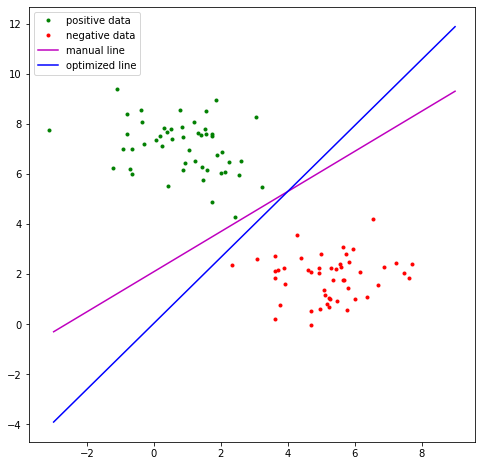

In [10]:
def line_parameters(w):
  # compute parametric line parameters from cartesian coordinates
  beta = - w[1] / w[2]
  gamma = - w[0] / w[2]
  return beta, gamma


from matplotlib import pyplot
pyplot.figure(figsize=(8,8))

# plot the positive data points
pyplot.plot(X[T==1, 0], X[T==1, 1], "g.", label="positive data")
# plot the negative data points
pyplot.plot(X[T==-1, 0], X[T==-1, 1], "r.", label="negative data")

# define positions where to evaluate the line:
x1 = np.array([-3, 9])

# compute line parameters for manual line
beta, gamma = line_parameters(w_manual)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot lines (might need to call this function twice for the two lines)
pyplot.plot(x1, x2, "m-", label="manual line")

# compute line parameters for optimized line
beta, gamma = line_parameters(w_star)
# now, compute the values according to our parametric form:
x2 = beta * x1 + gamma
# plot lines (might need to call this function twice for the two lines)
pyplot.plot(x1, x2, "b-", label="optimized line")

# make the plot more beautiful
pyplot.legend()

